https://en.wikipedia.org/wiki/Euclidean_minimum_spanning_tree

In [1]:
def kruskal(edges):
    dsu = {}
    def get(v):
        if dsu.setdefault(v, -1) < 0:
            return v
        else:
            dsu[v] = get(dsu[v])
            return dsu[v]
    def unite(a, b):
        a, b = get(a), get(b)
        if dsu[a] > dsu[b]:
            a, b = b, a
        dsu[a] += dsu[b]
        dsu[b] = a
        pass
    edges = sorted(enumerate(edges), key=lambda x: x[1][-1])
    res = []
    for i, edge in edges:
        a, b, weight = edge
        if get(a) != get(b):
            unite(a, b)
            res.append(i)
    return res

def geometry_mst(points):
    from scipy.spatial import Delaunay
    from scipy.spatial.distance import euclidean
    tri = Delaunay(points)
    edges = []
    for tr in tri.simplices:
        for ind in range(0, 3):
            weight = euclidean(tri.points[tr[ind - 1]], tri.points[tr[ind]])
            edges.append([tr[ind - 1], tr[ind], weight])
    return [edges[i][:-1] for i in kruskal(edges)]

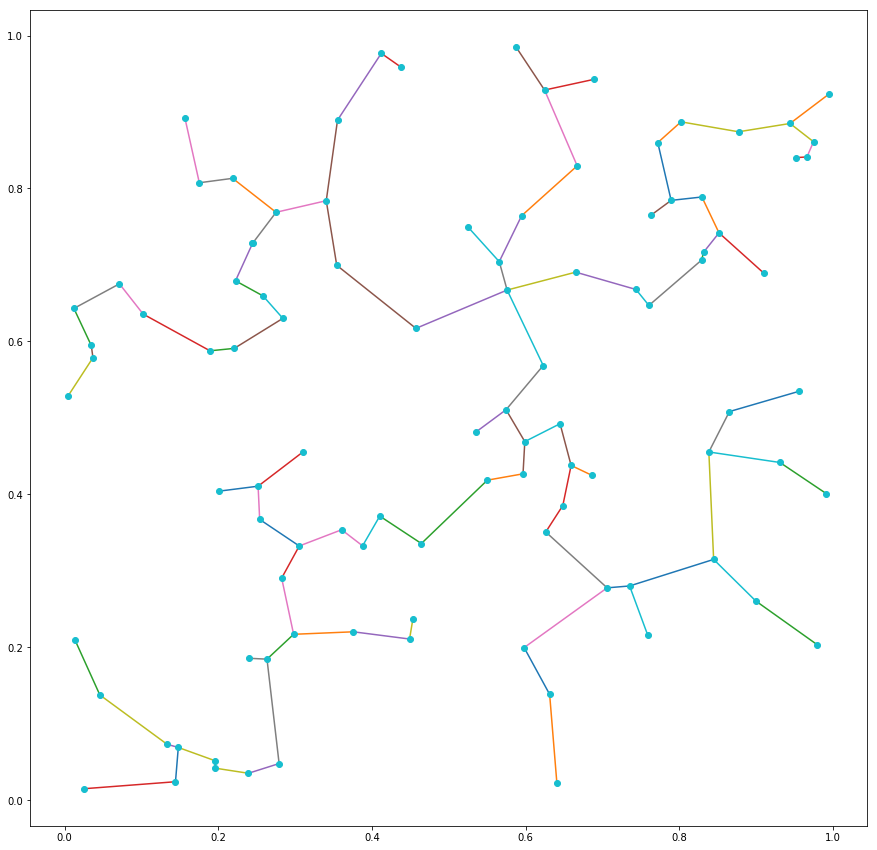

In [3]:
import numpy as np
points = np.random.rand(100, 2)
mst = geometry_mst(points)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for a, b in mst:
    plt.plot([points[a, 0], points[b, 0]], [points[a, 1], points[b, 1]])
plt.plot(points[:,0], points[:,1], 'o')
plt.show()